# Loading the dataset

In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
from numpy import nan as NA
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files


drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
df = pd.read_csv('/content/drive/MyDrive/Notebooks/AB/AB_Test_Results.csv')

# Separation of groups

In [3]:
df.shape

(10000, 3)

In [ ]:
df.head()

,USER_ID,VARIANT_NAME,REVENUE
0,737,variant,0.0
1,2423,control,0.0
2,9411,control,0.0
3,7311,control,0.0
4,6174,variant,0.0


In [ ]:
def perc_miss(df):
    miss = df.isnull().sum().sort_values(ascending=False)
    miss = miss[miss.values != 0]
    tt_cels = np.product(df.shape)
    tt_missing = miss.sum()

    perc = round(((tt_missing/tt_cels) * 100), 3)
    pr = 'Percent of miss: ' + str(perc) + "%"
    _all = "In sum: " + str(tt_missing.sum())


    miss_perc = round((miss / df.shape[0]) * 100, 3)


    miss_info = miss.astype(str) + ' (' + miss_perc.astype(str) + '%)'

    return pr, _all, miss_info


In [ ]:
perc_miss(df)

<ipython-input-75-d1e3f6df6c5b>:1: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  perc_miss(df)


('Percent of miss: 0.0%', 'In sum: 0', Series([], dtype: object))

In [ ]:
df.shape

(10000, 3)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
dupl = (df.groupby("USER_ID")["VARIANT_NAME"].nunique() == 1)

dupl = dupl[dupl]


df = df[df["USER_ID"].isin(dupl.index)]

In [ ]:
variant = df[df['VARIANT_NAME'] == 'variant' ]

In [ ]:
control = df[df['VARIANT_NAME'] == 'control' ]

# EDA + Handling outliers

In [ ]:
df.shape

(4821, 3)

In [ ]:
variant.describe().T

,count,mean,std,min,25%,50%,75%,max
USER_ID,2407.0,4968.836311,2894.149437,4.0,2437.0,4951.0,7383.0,9995.00
REVENUE,2407.0,0.074499,0.854413,0.0,0.0,0.0,0.0,23.04


In [ ]:
control.describe().T

,count,mean,std,min,25%,50%,75%,max
USER_ID,2414.0,5013.042254,2908.727995,2.0,2495.5,5008.5,7613.0,9998.00
REVENUE,2414.0,0.194930,4.151447,0.0,0.0,0.0,0.0,196.01


In [ ]:
def plot_with_percentiles(dataframe, col):

    if isinstance(col, str):
        col = [col]

    n_cols = 2
    n_rows = (len(col) + n_cols - 1) // n_cols


    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 20))


    if n_rows == 1:
        axes_flat = axes if n_cols == 1 else axes.flatten()
    else:
        axes_flat = axes.flatten()


    for ax in axes_flat[len(col):]:
        fig.delaxes(ax)

    for i, column_name in enumerate(col):

        sns.boxplot(y=dataframe[column_name], ax=axes_flat[i])
        axes_flat[i].set_title(column_name)

        percentile1 = dataframe[column_name].quantile(0.01)
        percentile99 = dataframe[column_name].quantile(0.99)


        axes_flat[i].axhline(percentile1, color='red', linestyle='--', label='1st Percentile')
        axes_flat[i].axhline(percentile99, color='red', linestyle='--', label='99th Percentile')

        if i == 0:
            axes_flat[i].legend()


    plt.tight_layout()

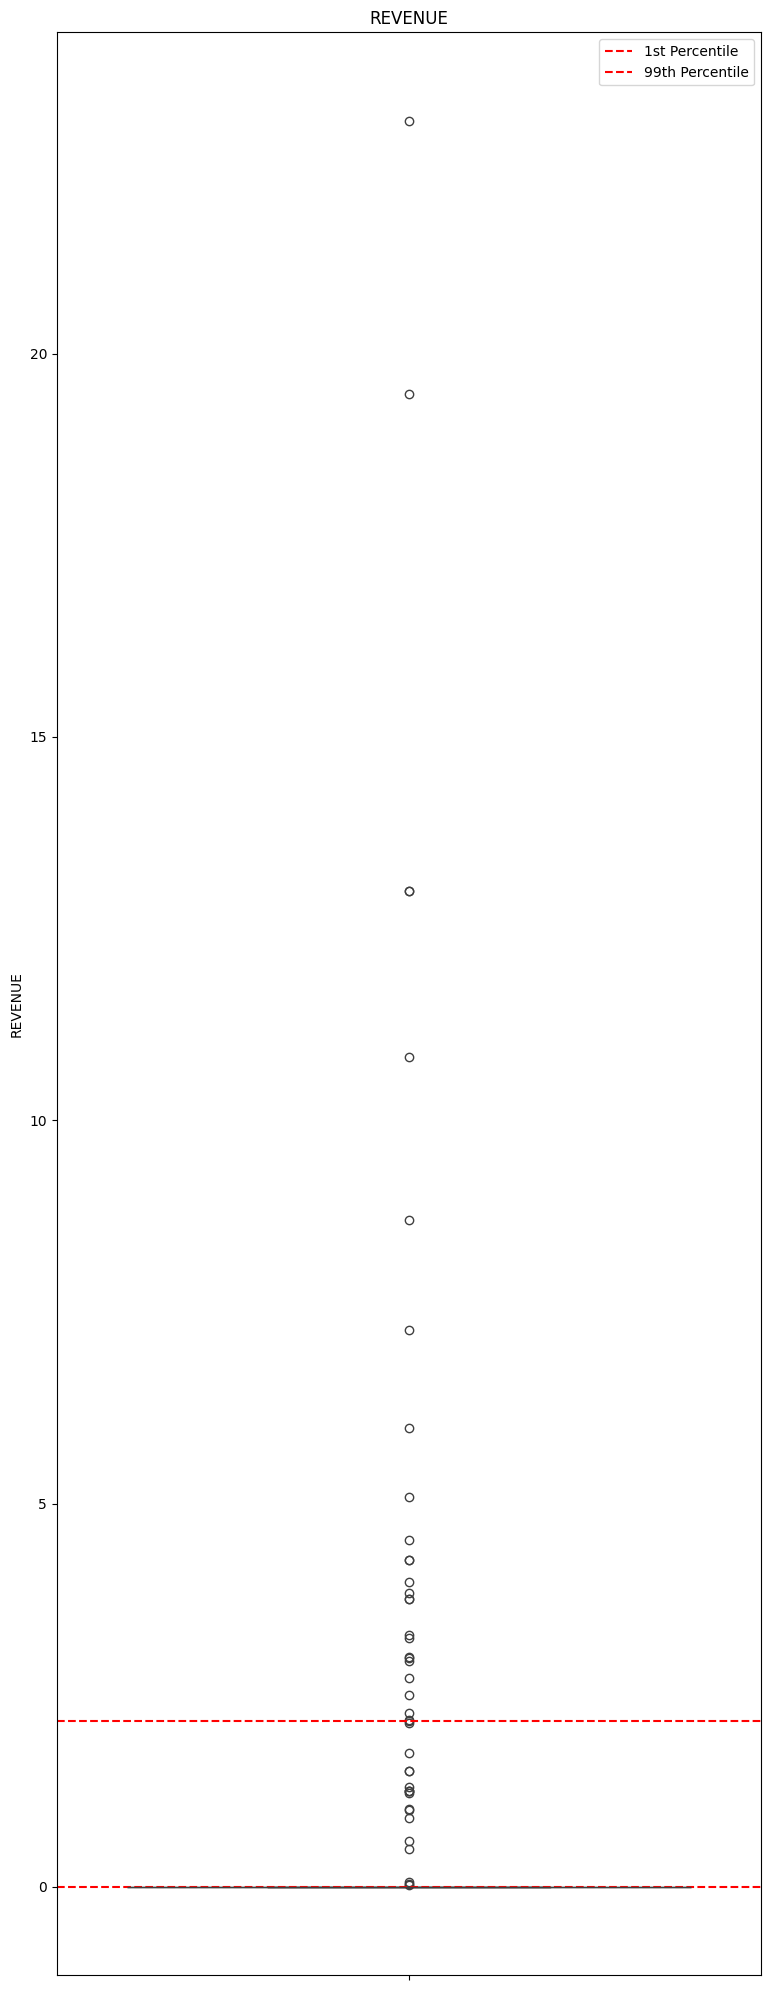

In [ ]:
plot_with_percentiles(variant,'REVENUE')

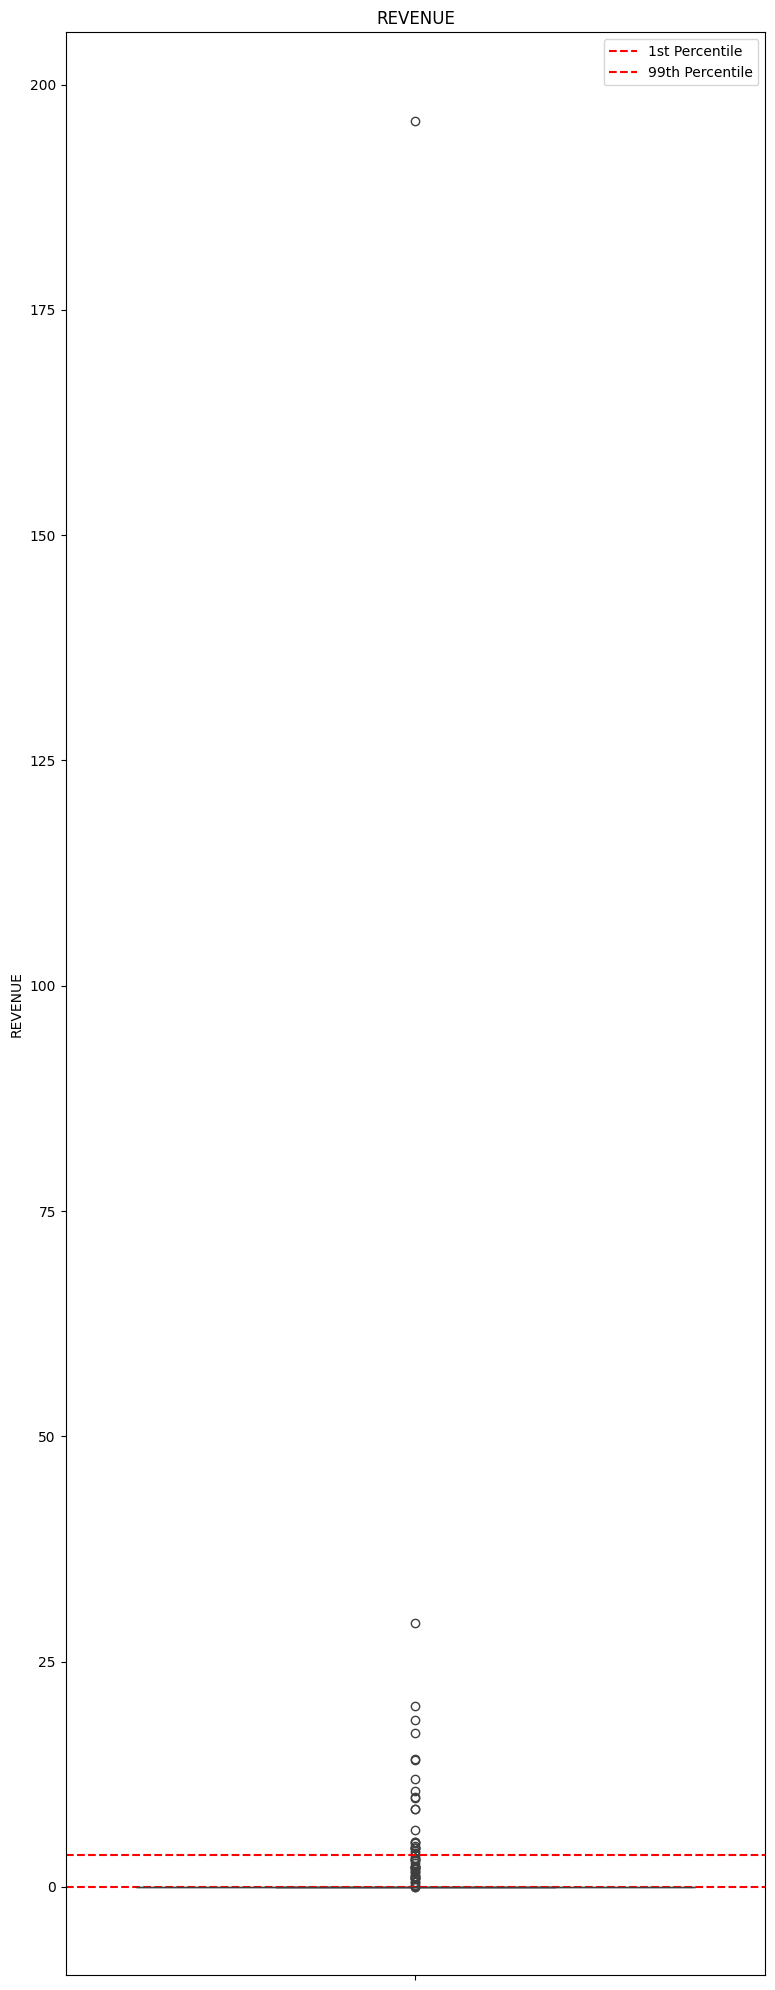

In [ ]:
plot_with_percentiles(control,'REVENUE')

<ipython-input-87-babe0eaf0879>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes_flat[i].set_xticklabels(axes_flat[i].get_xticklabels(), rotation=45)  # Повертаємо мітки осей
<ipython-input-87-babe0eaf0879>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes_flat[i].set_xticklabels(axes_flat[i].get_xticklabels(), rotation=45)  # Повертаємо мітки осей
<ipython-input-87-babe0eaf0879>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes_flat[i].set_xticklabels(axes_flat[i].get_xticklabels(), rotation=45)  # Повертаємо мітки осей


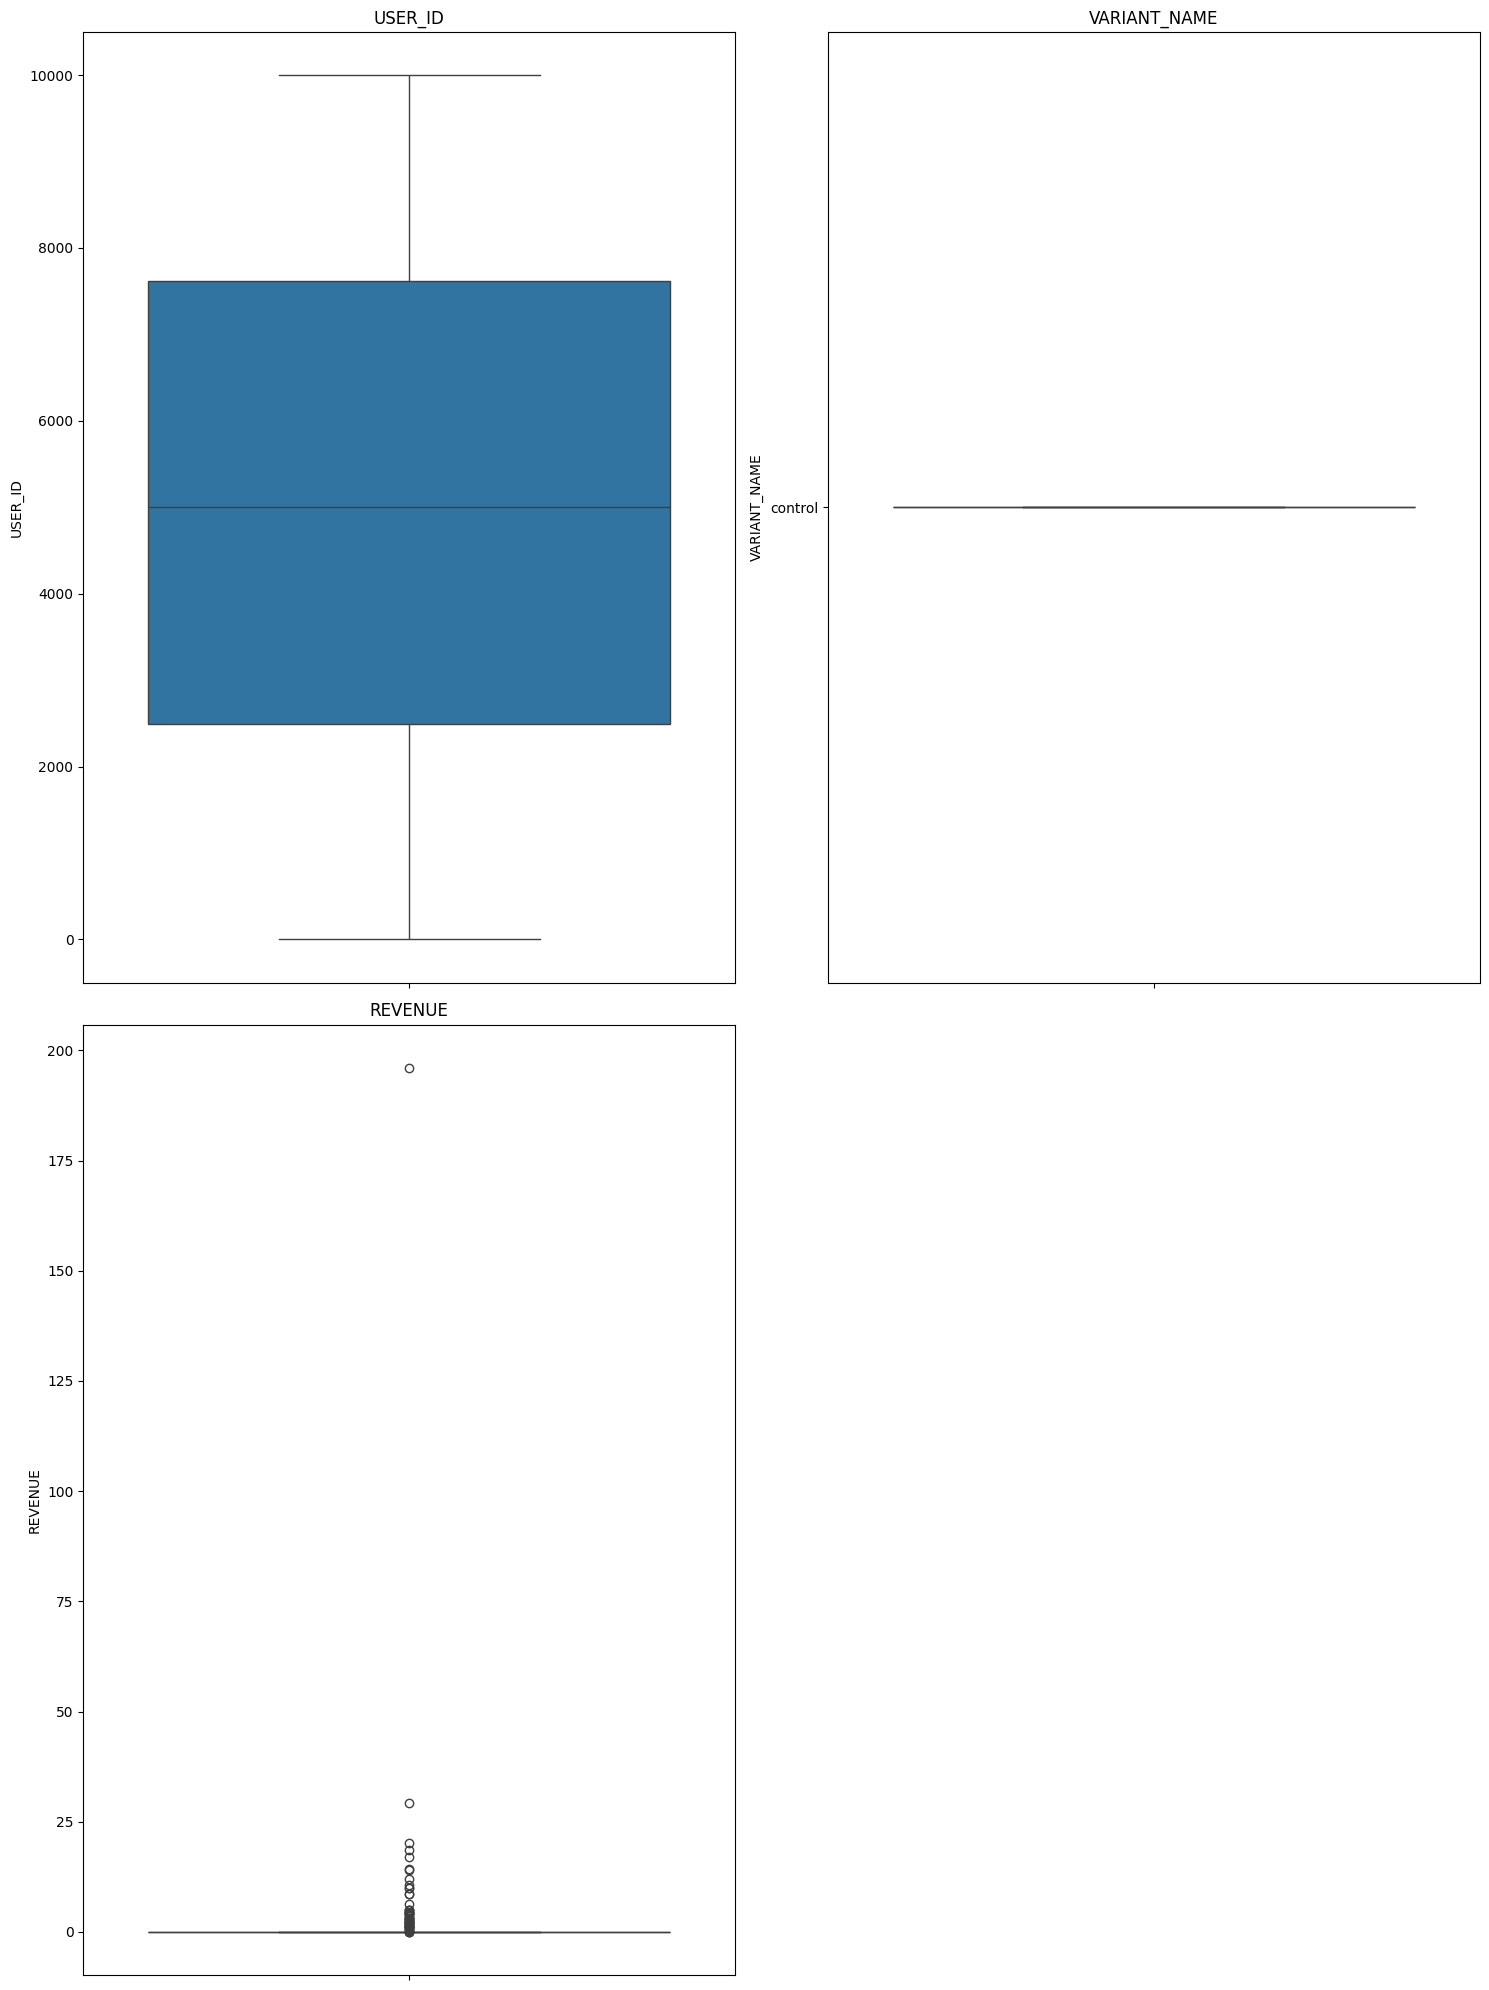

In [ ]:

col = list(control.columns)

n_cols = 2
n_rows = (len(col) + n_cols - 1) // n_cols


fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 20))


for ax in axes.flatten()[len(col):]:
    ax.remove()


axes_flat = axes.flatten()

for i, column_name in enumerate(col):

    sns.boxplot(control[column_name], ax=axes_flat[i])
    axes_flat[i].set_title(column_name)
    axes_flat[i].set_xticklabels(axes_flat[i].get_xticklabels(), rotation=45)


plt.tight_layout()



<ipython-input-88-11d51021d477>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes_flat[i].set_xticklabels(axes_flat[i].get_xticklabels(), rotation=45)  # Повертаємо мітки осей
<ipython-input-88-11d51021d477>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes_flat[i].set_xticklabels(axes_flat[i].get_xticklabels(), rotation=45)  # Повертаємо мітки осей
<ipython-input-88-11d51021d477>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes_flat[i].set_xticklabels(axes_flat[i].get_xticklabels(), rotation=45)  # Повертаємо мітки осей


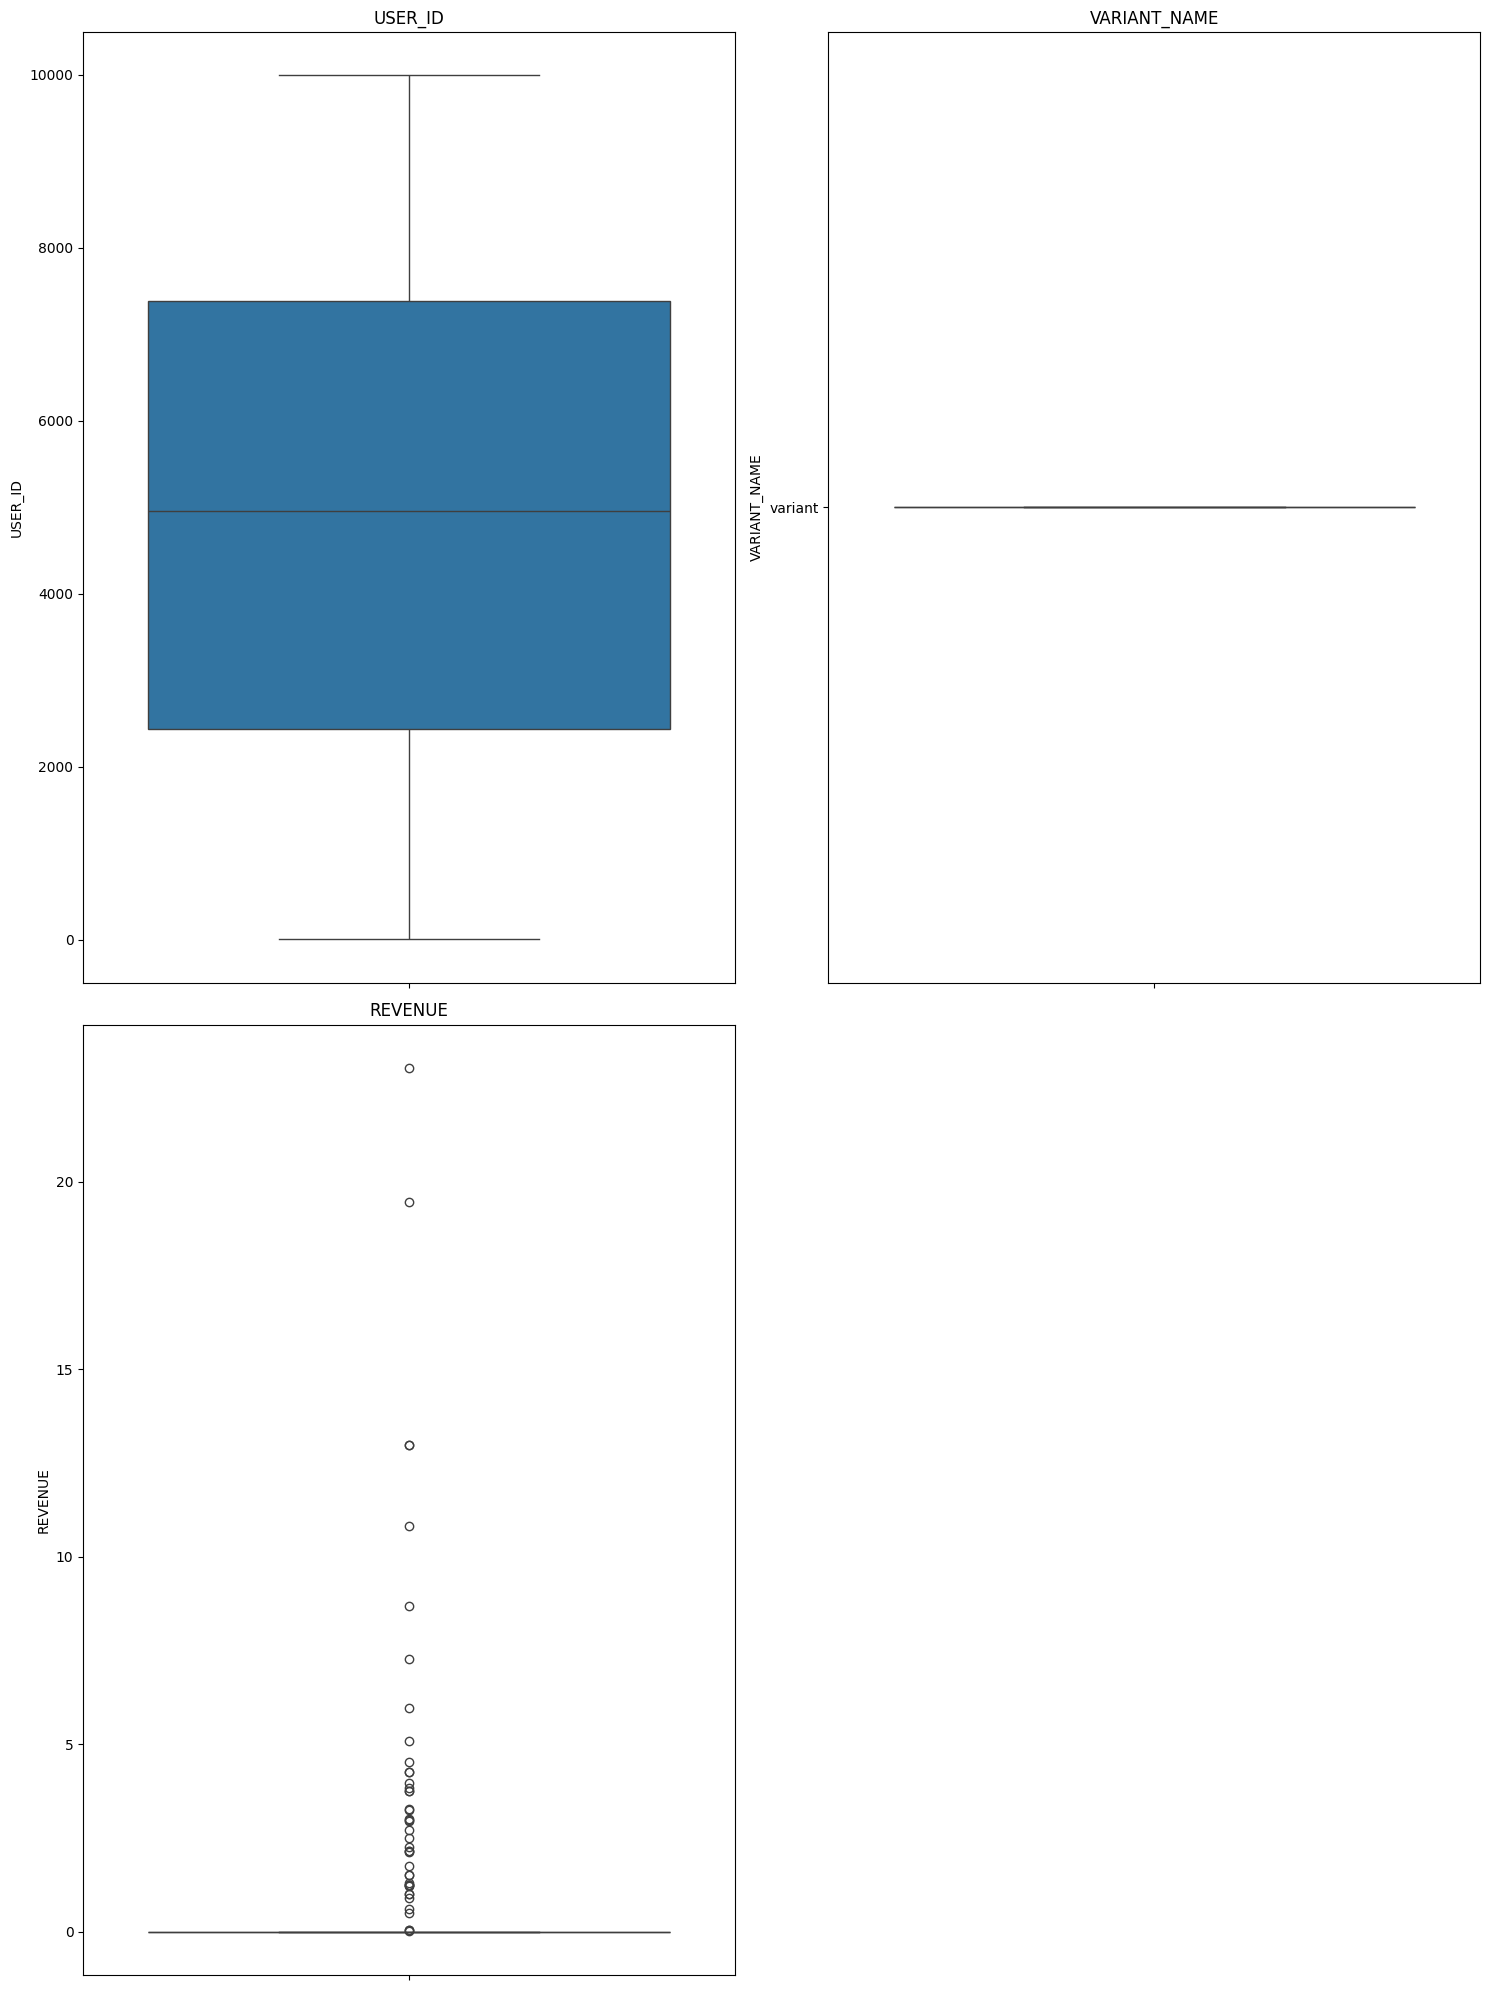

In [ ]:
col = list(variant.columns)

n_cols = 2
n_rows = (len(col) + n_cols - 1) // n_cols


fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 20))


for ax in axes.flatten()[len(col):]:
    ax.remove()


axes_flat = axes.flatten()

for i, column_name in enumerate(col):

    sns.boxplot(variant[column_name], ax=axes_flat[i])
    axes_flat[i].set_title(column_name)
    axes_flat[i].set_xticklabels(axes_flat[i].get_xticklabels(), rotation=45)


plt.tight_layout()



In [ ]:
control.columns

Index(['USER_ID', 'VARIANT_NAME', 'REVENUE'], dtype='object')

In [ ]:
control.groupby('USER_ID')['REVENUE'].size().sum()

2414

In [ ]:
variant.groupby('USER_ID')['REVENUE'].size().sum()

2407

In [ ]:
def calculate_outlier_thresholds(df, col):
    q1 = df[col].quantile(0.01)
    q3 = df[col].quantile(0.99)
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    return lower_bound.round(), upper_bound.round()

def cap_outliers(df, col):
    lower_bound, upper_bound = calculate_outlier_thresholds(df, col)
    df.loc[df[col] < lower_bound, col] = lower_bound
    df.loc[df[col] > upper_bound, col] = upper_bound


In [ ]:
cap_outliers(control,'REVENUE')

In [ ]:
cap_outliers(variant,'REVENUE')

<ipython-input-97-b8e44e5e0ba9>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes_flat[i].set_xticklabels(axes_flat[i].get_xticklabels(), rotation=45)
<ipython-input-97-b8e44e5e0ba9>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes_flat[i].set_xticklabels(axes_flat[i].get_xticklabels(), rotation=45)
<ipython-input-97-b8e44e5e0ba9>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes_flat[i].set_xticklabels(axes_flat[i].get_xticklabels(), rotation=45)


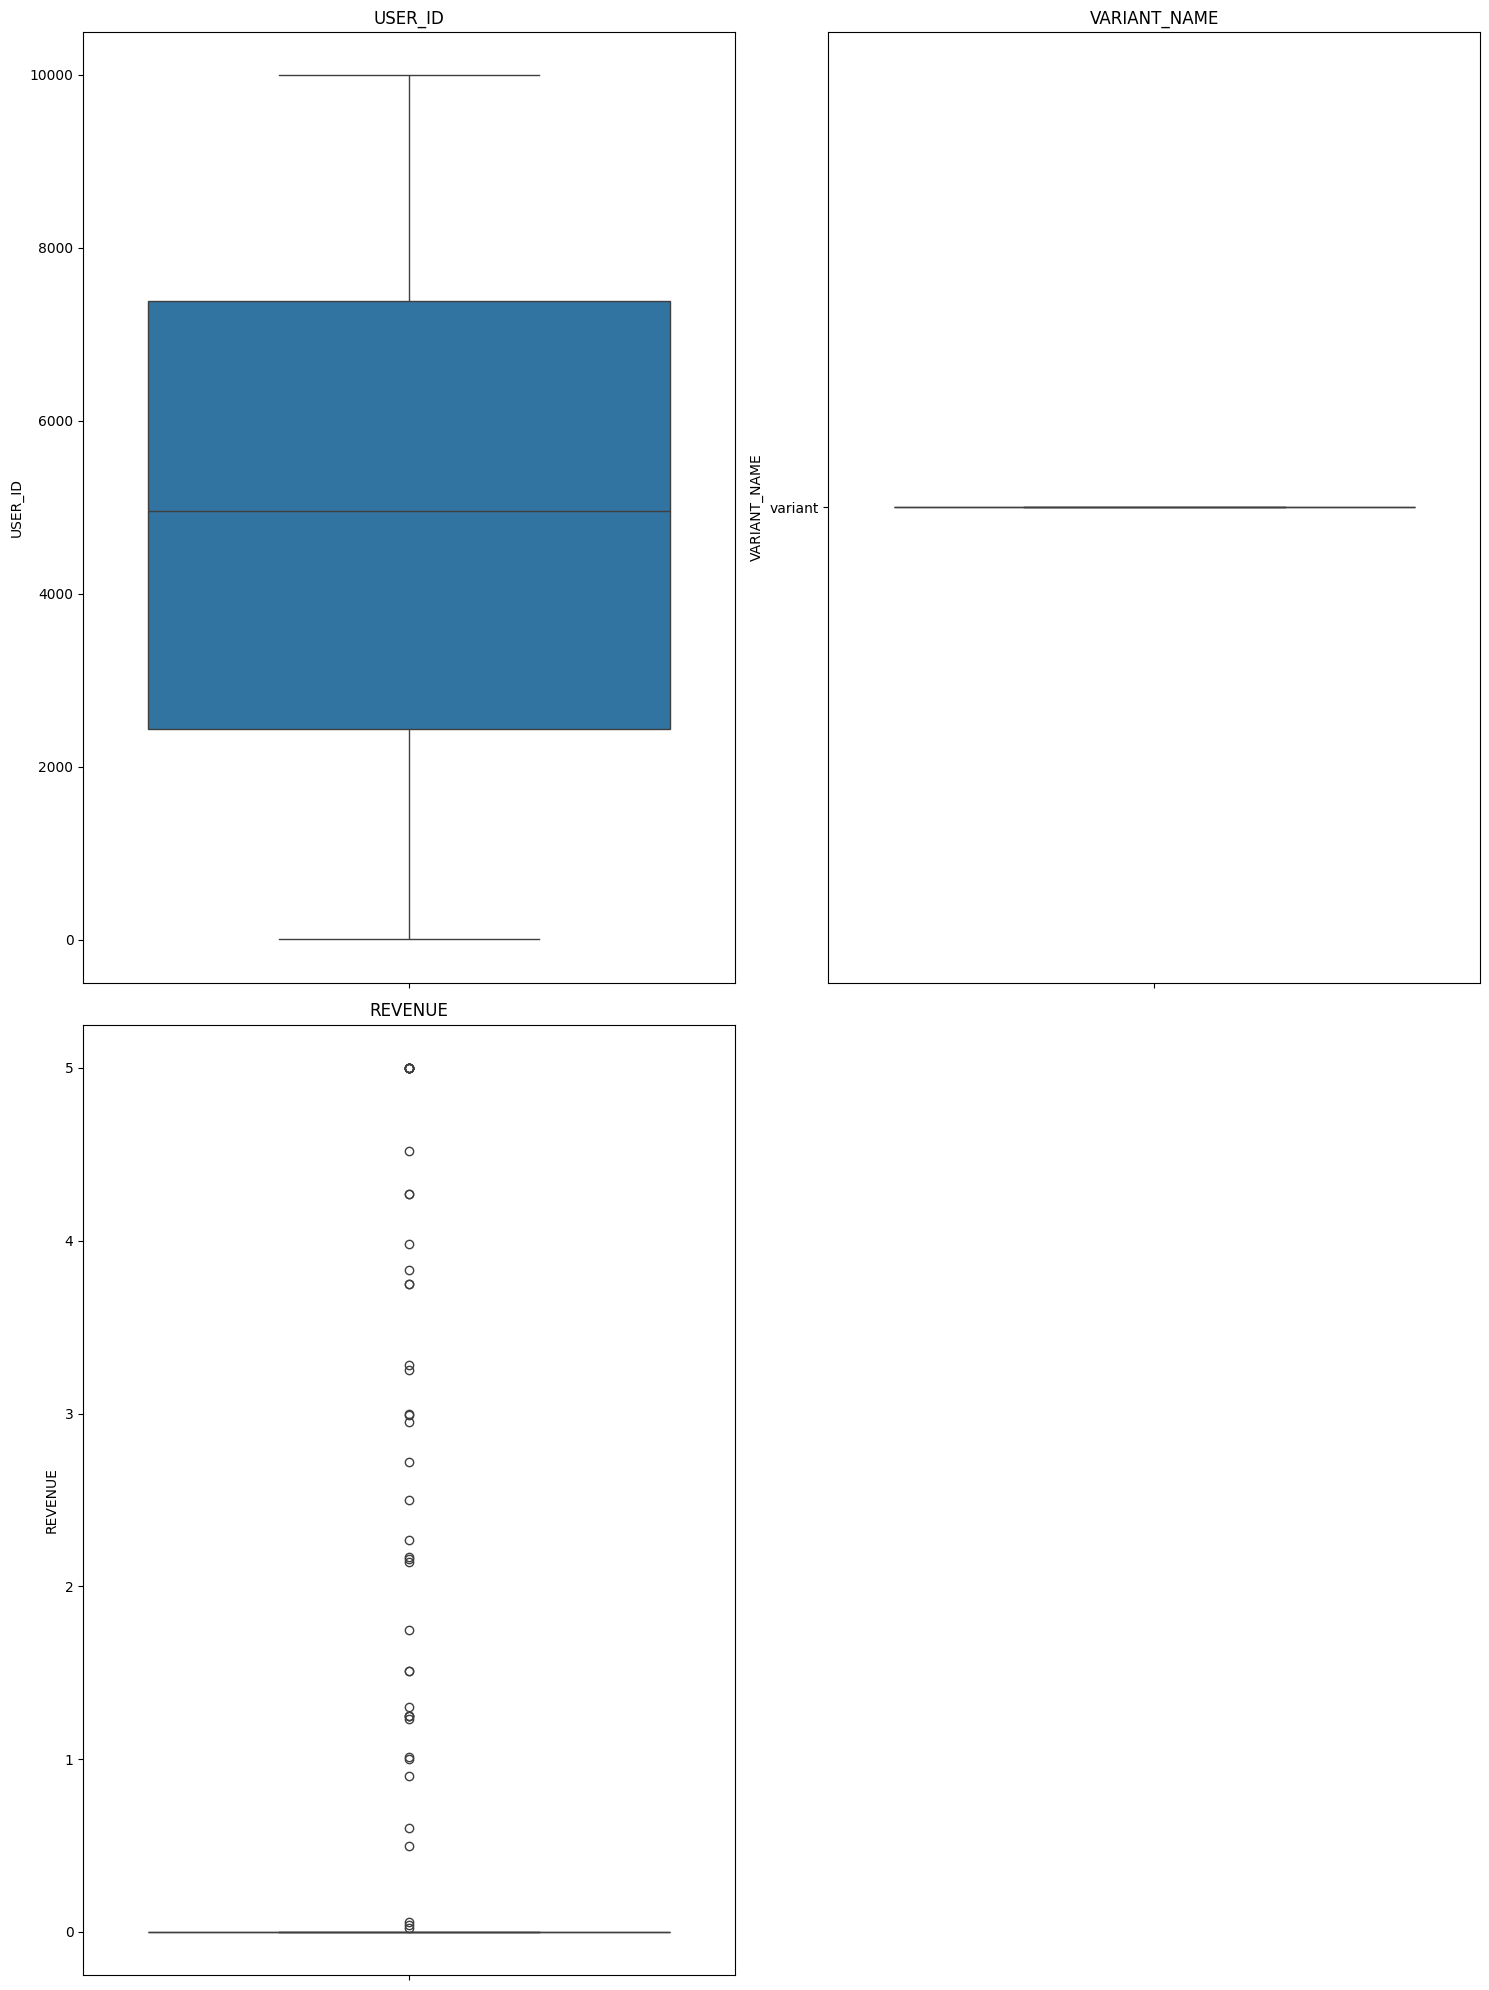

In [ ]:

col = list(variant.columns)

n_cols = 2
n_rows = (len(col) + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 20))


for ax in axes.flatten()[len(col):]:
    ax.remove()

ї
axes_flat = axes.flatten()

for i, column_name in enumerate(col):

    sns.boxplot(variant[column_name], ax=axes_flat[i])
    axes_flat[i].set_title(column_name)
    axes_flat[i].set_xticklabels(axes_flat[i].get_xticklabels(), rotation=45)


plt.tight_layout()



<ipython-input-98-951357173878>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes_flat[i].set_xticklabels(axes_flat[i].get_xticklabels(), rotation=45)
<ipython-input-98-951357173878>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes_flat[i].set_xticklabels(axes_flat[i].get_xticklabels(), rotation=45)
<ipython-input-98-951357173878>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes_flat[i].set_xticklabels(axes_flat[i].get_xticklabels(), rotation=45)


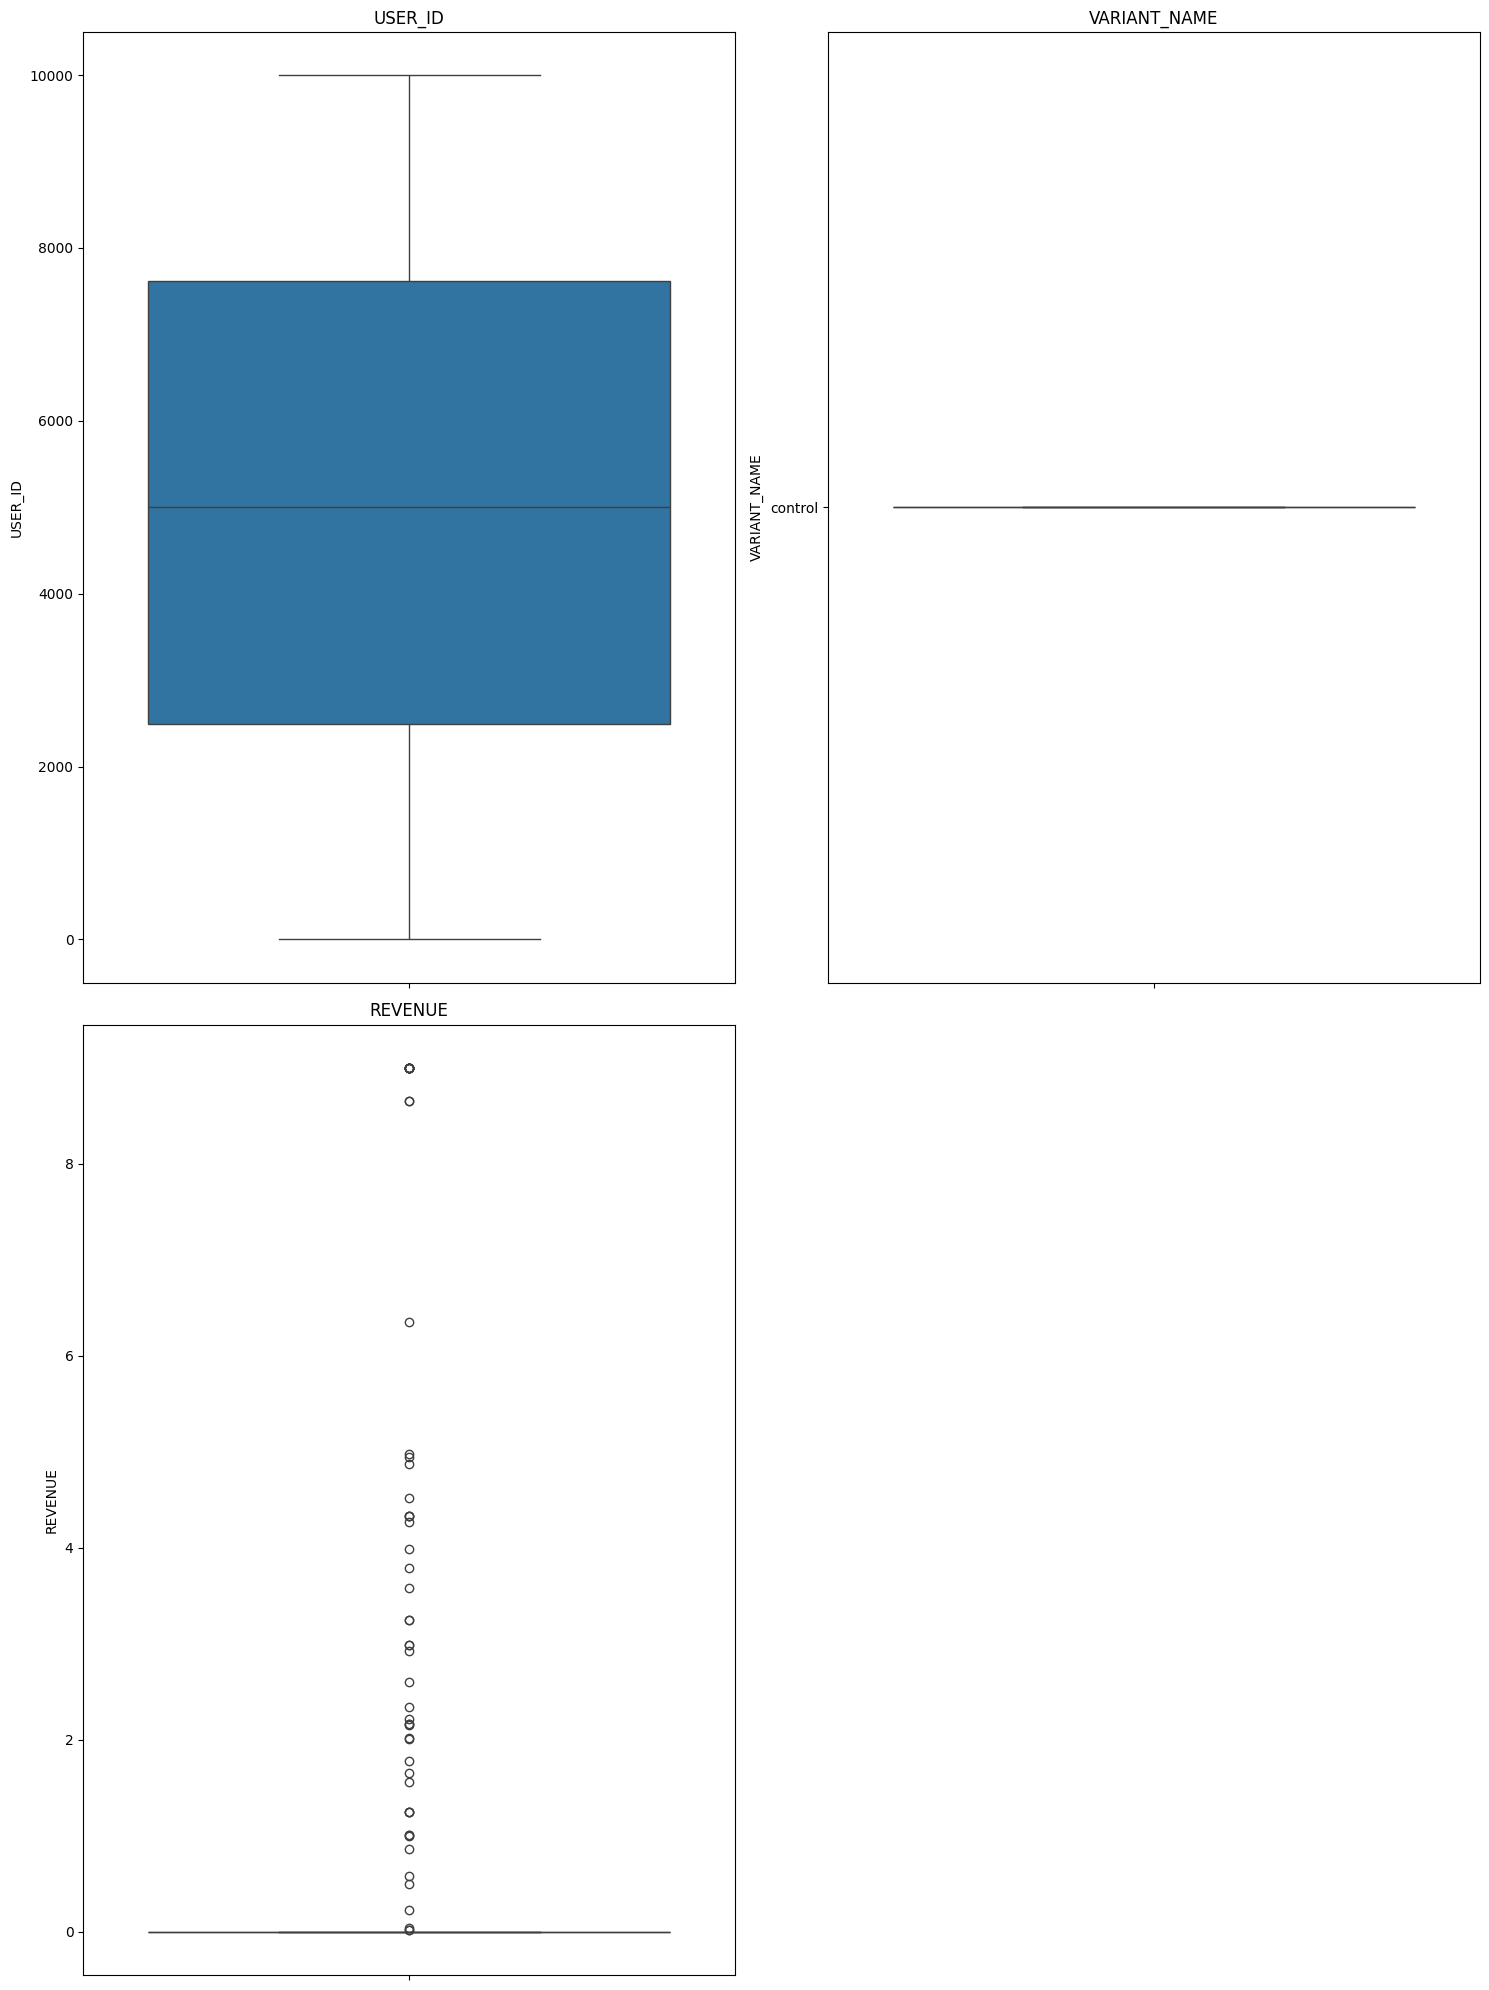

In [ ]:

col = list(control.columns)

n_cols = 2
n_rows = (len(col) + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 20))


for ax in axes.flatten()[len(col):]:
    ax.remove()


axes_flat = axes.flatten()

for i, column_name in enumerate(col):

    sns.boxplot(control[column_name], ax=axes_flat[i])
    axes_flat[i].set_title(column_name)
    axes_flat[i].set_xticklabels(axes_flat[i].get_xticklabels(), rotation=45)


plt.tight_layout()



<ipython-input-103-399638d01b7c>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data, shade=True, ax=ax)


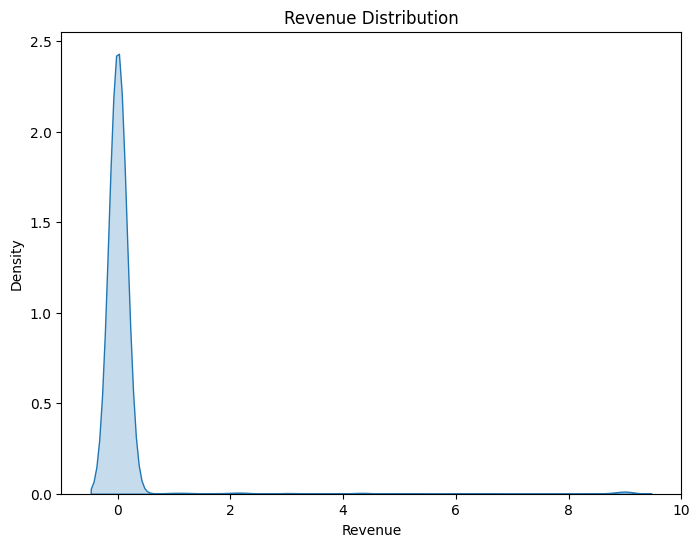

In [ ]:
data = control['REVENUE']


fig, ax = plt.subplots(figsize=(8, 6))


sns.kdeplot(data, shade=True, ax=ax)

# Set labels and title
ax.set_xlabel('Revenue')
ax.set_ylabel('Density')
ax.set_title('Revenue Distribution')

plt.xlim(-1,10)
plt.show()

In [ ]:
control.describe().T

,count,mean,std,min,25%,50%,75%,max
USER_ID,2414.0,5013.042254,2908.727995,2.0,2495.5,5008.5,7613.0,9998.0
REVENUE,2414.0,0.090195,0.755456,0.0,0.0,0.0,0.0,9.0


In [ ]:
variant.describe().T

,count,mean,std,min,25%,50%,75%,max
USER_ID,2407.0,4968.836311,2894.149437,4.0,2437.0,4951.0,7383.0,9995.0
REVENUE,2407.0,0.049015,0.424923,0.0,0.0,0.0,0.0,5.0


In [ ]:
control.shape

(2407, 3)

In [ ]:
variant.shape

(2407, 3)

# Test

In [ ]:
pip install scipy pandas


In [ ]:
from scipy.stats import shapiro
from typing import Tuple

def check_normal_distribution(control: pd.DataFrame, variant: pd.DataFrame, variable: str) -> Tuple[pd.Series, pd.Series]:

    control_data = control[variable]
    variant_data = variant[variable]

    control_stat, control_p_value = shapiro(control_data)
    variant_stat, variant_p_value = shapiro(variant_data)


    print("Control Group:")
    print(f"Shapiro-Wilk Statistic: {control_stat:.4f}")
    print(f"P-value: {control_p_value:.4f}")

    print("\nVariant Group:")
    print(f"Shapiro-Wilk Statistic: {variant_stat:.4f}")
    print(f"P-value: {variant_p_value:.4f}")

    alpha = 0.05


    if control_p_value < alpha:
        print("Reject the null hypothesis for control group: The data is not normally distributed.")
    else:
        print("Fail to reject the null hypothesis for control group: The data is normally distributed.")

    if variant_p_value < alpha:
        print("Reject the null hypothesis for variant group: The data is not normally distributed.")
    else:
        print("Fail to reject the null hypothesis for variant group: The data is normally distributed.")


check_normal_distribution(control, variant,'REVENUE')


Control Group:
Shapiro-Wilk Statistic: 0.0975
P-value: 0.0000

Variant Group:
Shapiro-Wilk Statistic: 0.0924
P-value: 0.0000
Reject the null hypothesis for control group: The data is not normally distributed.
Reject the null hypothesis for variant group: The data is not normally distributed.


In [ ]:
from scipy.stats import levene

def homogen_var_check(control,variant,variable):
  stat, p_value = levene(control[variable], variant[variable])

  print(f'Test Statistic: {stat:.4f}')
  print(f'p-value: {p_value:.4f}')

  alpha = 0.05
  if p_value < alpha:
      print("Reject the null hypothesis: (BOTH GROUPS HAVE THE DIFFERENT VARIANCES)")
  else:
      print("Fail to reject the null hypothesis: (BOTH GROUPS HAVE THE SAME VARIANCES)")



homogen_var_check(control,variant,'REVENUE')


Test Statistic: 5.4368
p-value: 0.0198
Reject the null hypothesis: (BOTH GROUPS HAVE THE DIFFERENT VARIANCES)


In [ ]:
import pandas as pd
from scipy.stats import mannwhitneyu

control_revenue = control['REVENUE']
variant_revenue = variant['REVENUE']


u_stat, p_value = mannwhitneyu(control_revenue, variant_revenue, alternative='two-sided')


print(f"U-statistic: {u_stat}")
print(f"P-value: {p_value}")


alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between control and variant revenue.")
else:
    print("Fail to reject the null hypothesis: No significant difference between control and variant revenue.")


U-statistic: 2918515.0
P-value: 0.2590010426182946
Fail to reject the null hypothesis: No significant difference between control and variant revenue.
